# Linear Regression

In [30]:
# Imports
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import seaborn as sns

# read csv
data = pd.read_csv('cars.csv')
data.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [31]:
# Independent variable procesisng
X_list = data.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)

# Dependent variable procesisng
y_list = data.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
Y = torch.from_numpy(y_np)


In [32]:
# model initialization
from model import MPGPredictor

input_size = 1
output_size = 1

MPG_Predictor = MPGPredictor(input_size, output_size)

In [33]:
# loss function
loss_fucntion = nn.MSELoss()

# Hyper parameters
LR = 0.02
EPOCHS = 1000

# Optimizer
optimizer = torch.optim.SGD(MPG_Predictor.parameters(), lr=LR)

# Training loop
for i in range(EPOCHS):

    # Optimizer grad to zero
    optimizer.zero_grad()
    
    # Forward pass
    y_prediction = MPG_Predictor(X)

    # Compute loss
    loss = loss_fucntion(y_prediction, Y)

    # Calculate gredients
    loss.backward()

    # optimize
    optimizer.step()

    if i % 100 == 0:
        print('Epochs:', i)
        print('loss', loss)
        print('--------------------------')





Epochs: 0
loss tensor(401.3748, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 100
loss tensor(66.2562, grad_fn=<MseLossBackward0>)
--------------------------


Epochs: 200
loss tensor(40.0037, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 300
loss tensor(25.7250, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 400
loss tensor(17.9588, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 500
loss tensor(13.7347, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 600
loss tensor(11.4373, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 700
loss tensor(10.1877, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 800
loss tensor(9.5080, grad_fn=<MseLossBackward0>)
--------------------------
Epochs: 900
loss tensor(9.1384, grad_fn=<MseLossBackward0>)
--------------------------


<Axes: >

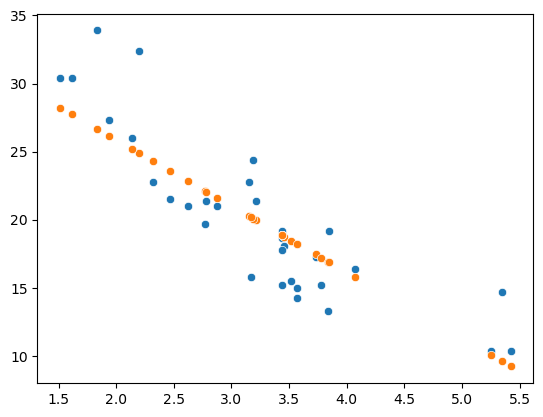

In [36]:
# Evaluation

y_prediction = MPG_Predictor(X).data.numpy().reshape(-1) # removing batch dimension

# plots
sns.scatterplot(x=X_list, y=y_list) # real target values against inputs
sns.scatterplot(x=X_list, y=y_prediction) # predictions againsts inputs

# Results
We can see from graph that we have trained the model well but it seems that slope can be improved.